## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split 
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

# Data Processing

In [2]:
df = pd.read_csv("Assignment.csv", thousands=',') 

In [3]:
#To check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7249 non-null   object 
 1   prices.amountMax     7249 non-null   float64
 2   prices.amountMin     7249 non-null   float64
 3   prices.availability  7249 non-null   object 
 4   prices.condition     7249 non-null   object 
 5   prices.currency      7249 non-null   object 
 6   prices.dateSeen      7249 non-null   object 
 7   prices.isSale        7249 non-null   bool   
 8   prices.merchant      7249 non-null   object 
 9   prices.shipping      4277 non-null   object 
 10  prices.sourceURLs    7249 non-null   object 
 11  asins                7249 non-null   object 
 12  brand                7249 non-null   object 
 13  categories           7249 non-null   object 
 14  dateAdded            7249 non-null   object 
 15  dateUpdated          7249 non-null   o

In [4]:
df

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,Yes,New,USD,2017-10-10T08:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,In Stock,New,USD,2018-06-01T12:00:00Z,False,bhphotovideo.com,Free Expedited Shipping for most orders over $49,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7246,AVpfUsrxLJeJML437Ezd,70.99,70.99,Yes,New,USD,2017-05-18T05:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN
7247,AVpfUsrxLJeJML437Ezd,71.99,71.99,Yes,New,USD,2017-08-28T11:00:00Z,False,Bestbuy.com,NaN,...,Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,"http://www.frys.com/product/8595219,https://re...",56035368998,1.8 pounds,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop the redundant and not useful features from the dataset
df = df.drop(["id","asins","prices.dateSeen","ean","imageURLs","prices.sourceURLs","sourceURLs","keys"
              ,"upc","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29","Unnamed: 30","weight"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prices.amountMax     7249 non-null   float64
 1   prices.amountMin     7249 non-null   float64
 2   prices.availability  7249 non-null   object 
 3   prices.condition     7249 non-null   object 
 4   prices.currency      7249 non-null   object 
 5   prices.isSale        7249 non-null   bool   
 6   prices.merchant      7249 non-null   object 
 7   prices.shipping      4277 non-null   object 
 8   brand                7249 non-null   object 
 9   categories           7249 non-null   object 
 10  dateAdded            7249 non-null   object 
 11  dateUpdated          7249 non-null   object 
 12  manufacturer         3235 non-null   object 
 13  manufacturerNumber   7249 non-null   object 
 14  name                 7249 non-null   object 
 15  primaryCategories    7249 non-null   o

In [7]:
df.isna().sum()

prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
manufacturer           4014
manufacturerNumber        0
name                      0
primaryCategories         0
dtype: int64

In [8]:
df[['prices.shipping','manufacturer']]

,prices.shipping,manufacturer
0,NaN,NaN
1,Expedited,Boytone
2,Expedited,Boytone
3,NaN,Boytone
4,NaN,Boytone
...,...,...
7244,NaN,Lowepro
7245,Free Expedited Shipping for most orders over $49,Lowepro
7246,NaN,Lowepro
7247,NaN,Lowepro


# Data Cleaning 

In [9]:
#Map the prices.availability data more readable
L1 = ["Yes","In Stock","TRUE","yes","32 available","7 available","More on the Way","Special Order"]
d1 = dict.fromkeys(L1, 'True')
L2 = ["Out Of Stock","No", "sold", "FALSE","Retired"]
d2 = dict.fromkeys(L2, 'False')
L3 = ['undefined']
d3 = dict.fromkeys(L3, 'Not Specified')
d = {**d1, **d2, **d3}
df['prices.availability'] = df['prices.availability'].map(d)

In [10]:
#Map the prices.conditions data more readable
L4 = ["New","new","New other (see details)"]
d4 = dict.fromkeys(L4, 'New')
L5 = ["Used", "Seller refurbished", "pre-owned", "Refurbished", "Manufacturer refurbished", 'refurbished']
d5 = dict.fromkeys(L5, 'Used')
L6 = ['New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"','5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties']
d6 = dict.fromkeys(L6, 'Not Specified')
d = {**d4, **d5, **d6}
df['prices.condition'] = df['prices.condition'].map(d)

In [11]:
#Map the prices.shipping data more readble
L7 = ["Free Shipping", 'Free Standard Shipping' ,"FREE", "Free Shipping for this Item","Free Delivery", 'Free Next Day Delivery (USA)']
d7 = dict.fromkeys(L7, 'Free Shipping')
L8 = ["Value","Freight",'USD 7.95', 'USD 7.25','USD 26.09', 'USD 10.00','USD 11.30', 'USD 15.42', 'USD 35.03', 'USD 0.99', 'Shipping Charges Apply', 'USD 60.00', 'USD 15.68', 'USD 5.99','USD 196.92', 'USD 22.64', 'USD 20.00', 'USD 13.32', 'USD 12.78', 'USD 13.25', 'USD 25.00', 'USD 6.65', 'USD 2.85', 'USD 7.81', 'USD 10.10', 'USD 75.00', 'USD 13.95', 'USD 20.55', 'USD 18.60', 'USD 11.75', 'USD 25.76', 'USD 27.94', 'USD 14.00', 'USD 13.60', 'USD 5.00', 'USD 13.61', 'USD 3.99', 'USD 7.50', 'USD 2.99', 'USD 12.21', 'USD 3.39', 'USD 22.13', 'USD 6.00', 'USD 4.88', 'USD 14.99', 'USD 4.96', 'USD 18.00', 'USD 10.95', 'CAD 18.61', 'USD 179.35', 'USD 24.04', 'USD 71.77', 'USD 140.00', 'USD 150.00', 'USD 29.99', 'USD 23.47', 'USD 79.42', 'USD 37.65', 'USD 16.45', 'USD 3.80', 'USD 16.00']
d8 = dict.fromkeys(L8, 'Standard')
L9 = ["Free Shipping on orders 35 and up", "Free Expedited Shipping for most orders over $49", "Free Standard Shipping on Orders Over $49"]
d9 = dict.fromkeys(L9, 'Free Shipping Condition')
d = {**d7, **d8, **d9}
df['prices.shipping'] = df['prices.shipping'].map(d)

In [12]:
df['prices.shipping'] = df['prices.shipping'].fillna("Not Specified")

In [13]:
#Map the prices.isSales data more readble
df["prices.isSale"] = df["prices.isSale"].map({True:"Yes", False:"No"})

In [14]:
#Map the dateAdded and dateUpdated data more readble
df["dateAdded"] = df["dateAdded"].str[0:10]
df["dateUpdated"] = df["dateUpdated"].str[0:10]

In [15]:
#Map the manufacturer data more readable
df['manufacturer'] = df['manufacturer'].fillna("Not Specified")

In [16]:
#To check is there still have the nan values or not 
df.isna().sum()

prices.amountMax       0
prices.amountMin       0
prices.availability    0
prices.condition       0
prices.currency        0
prices.isSale          0
prices.merchant        0
prices.shipping        0
brand                  0
categories             0
dateAdded              0
dateUpdated            0
manufacturer           0
manufacturerNumber     0
name                   0
primaryCategories      0
dtype: int64

In [17]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248
prices.amountMax,104.99,69,69,69.99,66.99,66,74.99,65.99,69.99,69,...,81.99,79.95,77.82,67.49,67.72,79.99,68.75,70.99,71.99,67.77
prices.amountMin,104.99,64.99,69,69.99,66.99,66,74.99,65.99,69.99,64,...,81.99,79.95,77.82,67.49,67.72,79.99,68.75,70.99,71.99,67.77
prices.availability,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
prices.condition,New,New,New,New,New,New,New,New,New,New,...,New,New,New,New,New,New,New,New,New,New
prices.currency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
prices.isSale,No,Yes,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
prices.merchant,Bestbuy.com,Walmart.com,Walmart.com,Bestbuy.com,Bestbuy.com,Walmart.com,California Electronics,Bestbuy.com,Walmart.com,Walmart.com,...,Bestbuy.com,bhphotovideo.com,bhphotovideo.com,bhphotovideo.com,bhphotovideo.com,Bestbuy.com,bhphotovideo.com,Bestbuy.com,Bestbuy.com,Walmart.com
prices.shipping,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,Standard,Not Specified,Not Specified,Not Specified,...,Not Specified,Free Shipping Condition,Free Shipping Condition,Free Shipping Condition,Free Shipping Condition,Not Specified,Free Shipping Condition,Not Specified,Not Specified,Not Specified
brand,Sanus,Boytone,Boytone,Boytone,Boytone,Boytone,Boytone,Boytone,Boytone,Boytone,...,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro,Lowepro
categories,"Audio & Video Accessories,TV Mounts,TV Accesso...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...","Stereos,Portable Bluetooth Speakers,TV, Video ...",...,"Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders...","Camera & Photo Accessories,Cameras, Camcorders..."


## Exploratary Data Analysis

1. How much sales can be generated based on the brands ? 

Text(0, 0.5, 'Sales')

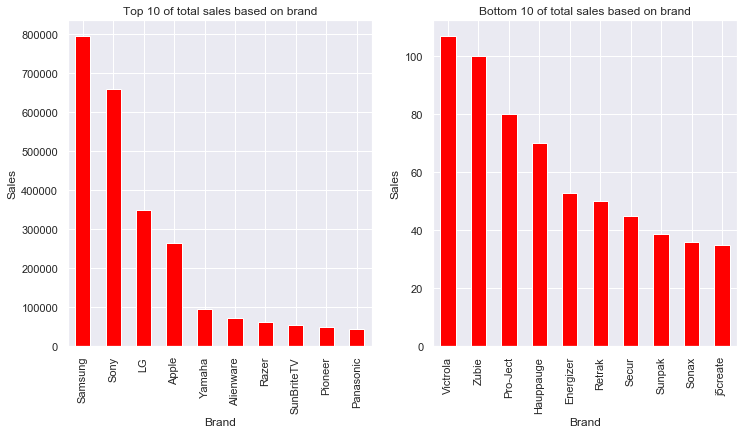

In [18]:
fig, axes = plt.subplots(figsize=(12,6))

plt.subplot(1,2,1)
df['prices.amountMax'].groupby(df["brand"]).sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar',colormap= 'autumn',title='Top 10 of total sales based on brand',x='t', y='hlReference')
plt.xlabel('Brand')
plt.ylabel('Sales')

plt.subplot(1,2,2)
df['prices.amountMax'].groupby(df["brand"]).sum().nsmallest(10).sort_values(ascending = False).plot(kind = 'bar',colormap= 'autumn',title='Bottom 10 of total sales based on brand')
plt.xlabel('Brand')
plt.ylabel('Sales')

2. Which products’ brands conducted the most promotions ?

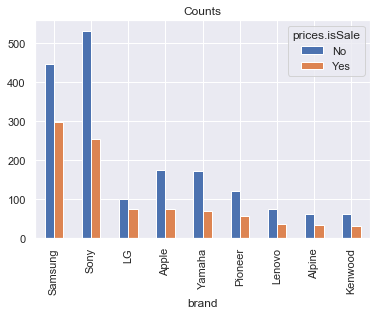

In [19]:
CT =pd.crosstab(df['brand'], df['prices.isSale']).sort_values(by=["Yes"],ascending=False).iloc[:9]
CT.plot(kind='bar', title='Counts')

3. How does the pricing strategy of a product among the different mechants ? 

In [20]:
a = df[df['name'] == '4TB Network OEM HDD Retail Kit (8-Pack, WD40EFRX, Red Drives)'].groupby(df['prices.merchant']).mean()
a = a[['prices.amountMax']].sort_values('prices.amountMax',ascending = True)
b = df[df['name'] == 'MU8000-Series 65-Class HDR UHD Smart LED TV'].groupby(df['prices.merchant']).mean()
b = b[['prices.amountMax']].sort_values('prices.amountMax',ascending = True)
c = df[df['name'] == 'SAMSUNG 65 Class 4K (2160P) Ultra HD Smart QLED HDR TV QN65Q6FNAFXZA (2018 Model)"'].groupby(df['prices.merchant']).mean()
c = c[['prices.amountMax']].sort_values('prices.amountMax',ascending = True)
d = df[df['name'] == 'XBR-X850E-Series 75-Class HDR UHD Smart LED TV'].groupby(df['prices.merchant']).mean()
d = d[['prices.amountMax']].sort_values('prices.amountMax',ascending = True)

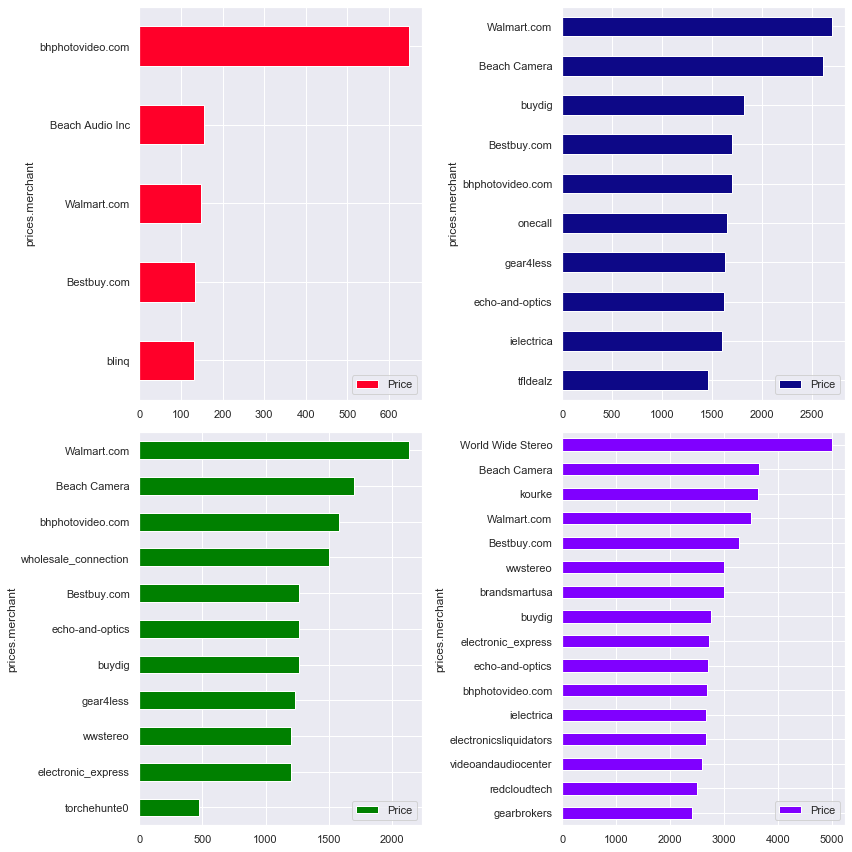

In [21]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

ax = a.plot(kind = 'barh', colormap = 'gist_rainbow', ax=axes[0][0])
ax.legend(["Price"]);
ax = b.plot(kind = 'barh', colormap = 'plasma', ax=axes[0][1])
ax.legend(["Price"]);
ax = c.plot(kind = 'barh', colormap = 'ocean', ax=axes[1][0])
ax.legend(["Price"]);
ax = d.plot(kind = 'barh', colormap = 'rainbow',ax=axes[1][1])
ax.legend(["Price"]);

fig.tight_layout()

4. How does the pricing strategy among the top 10 brands ? 

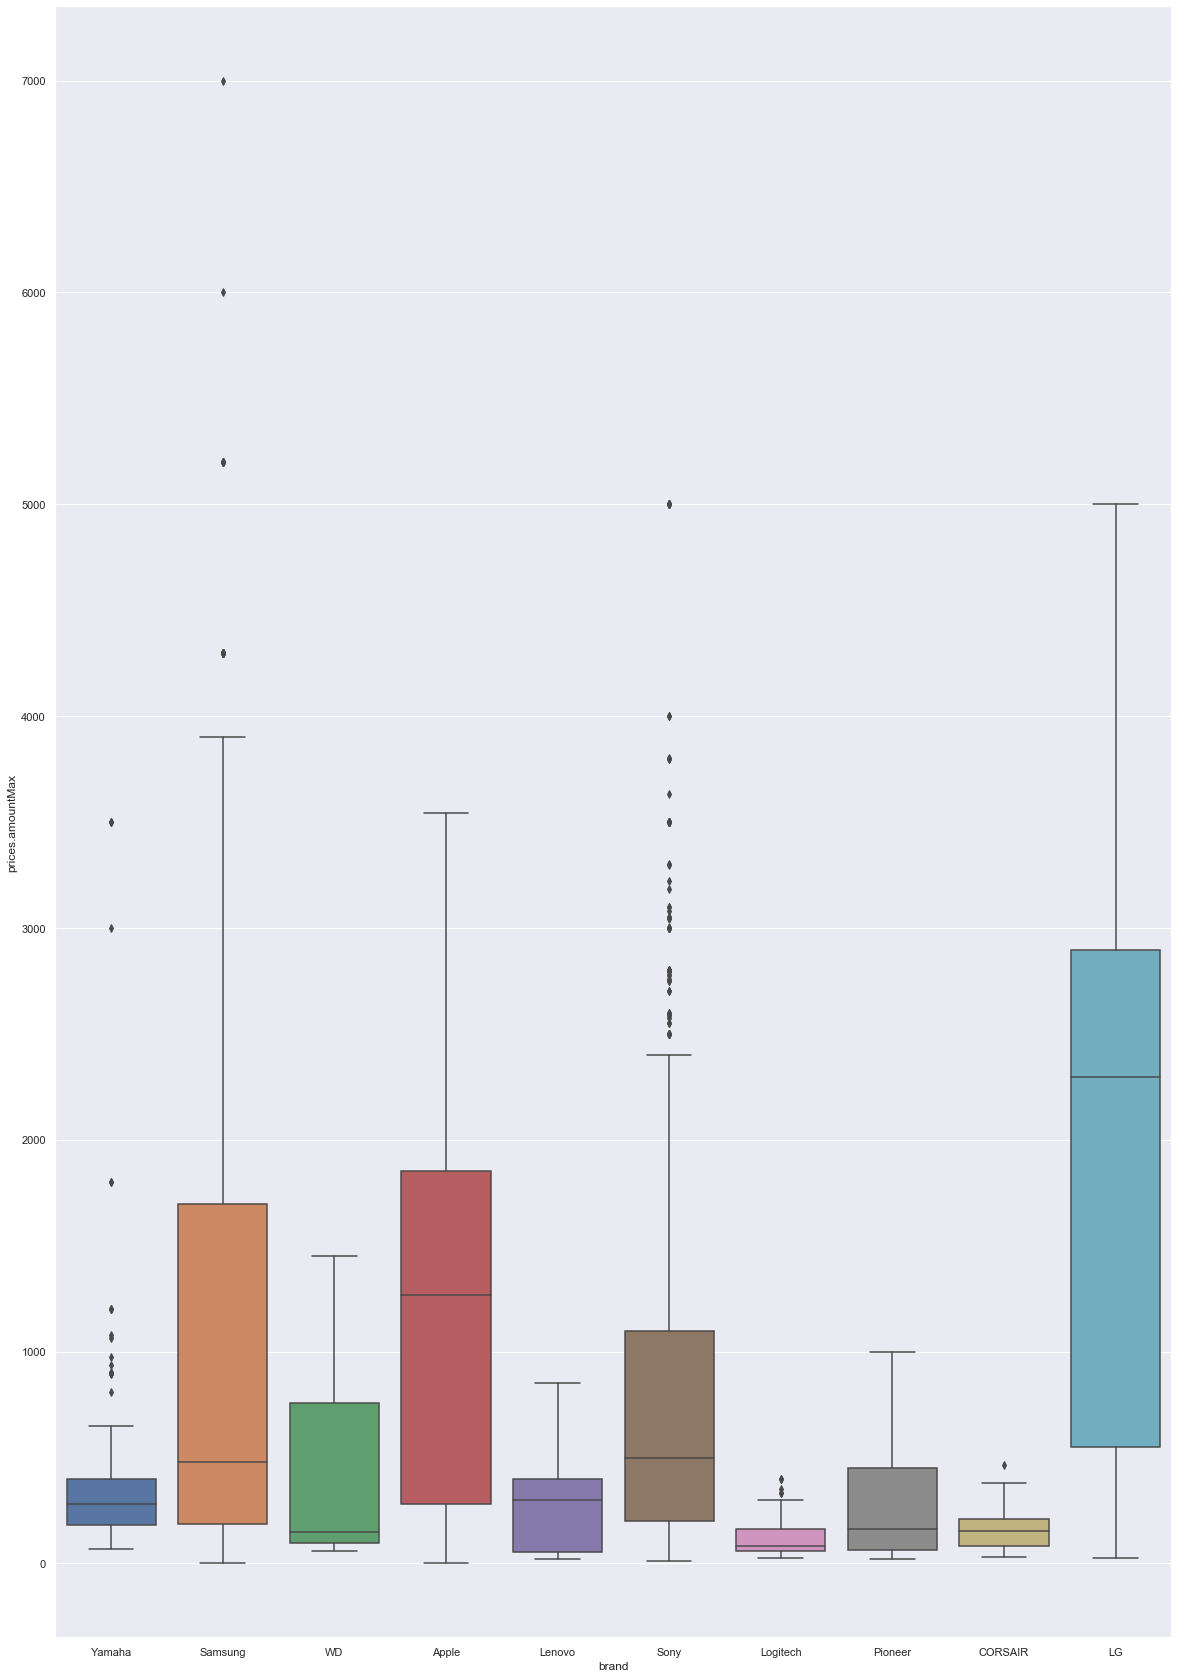

In [22]:
box = df.loc[df['brand'].isin(['Sony','Samsung','Apple','Yamaha','Pioneer','LG','Logitech','Lenovo','WD','CORSAIR'])]
fig, ax = plt.subplots(figsize=(20, 30))
sns.boxplot(data = box, x = 'brand', y = 'prices.amountMax')
#sns.boxplot(data = box, x = 'brand', y = 'prices.amountMax', showfliers=False)

5. What are the trends of the brand among the year?

In [23]:
samsung_trend = df.copy()
sony_trend = df.copy()
lg_trend = df.copy()
apple_trend = df.copy()

In [24]:
#Select out the particular row
filter3 = (samsung_trend["brand"] == 'Samsung') 
st = samsung_trend[filter3].copy()
filter4 = (sony_trend["brand"] == 'Sony') 
sot = sony_trend[filter4].copy()
filter5 = (lg_trend["brand"] == 'LG') 
lgt = lg_trend[filter5].copy()
filter6 = (apple_trend["brand"] == 'Apple') 
at = apple_trend[filter6].copy()

In [25]:
#Select out the particular column
st.drop(["prices.availability","prices.condition","prices.isSale","prices.merchant","dateAdded","prices.amountMin","prices.currency", "prices.shipping", "categories","dateUpdated","manufacturer","manufacturerNumber","name","primaryCategories"],1,inplace=True)
sot.drop(["prices.availability","prices.condition","prices.isSale","prices.merchant","dateAdded","prices.amountMin","prices.currency", "prices.shipping", "categories","dateUpdated","manufacturer","manufacturerNumber","name","primaryCategories"],1,inplace=True)
lgt.drop(["prices.availability","prices.condition","prices.isSale","prices.merchant","dateAdded","prices.amountMin","prices.currency", "prices.shipping", "categories","dateUpdated","manufacturer","manufacturerNumber","name","primaryCategories"],1,inplace=True)
at.drop(["prices.availability","prices.condition","prices.isSale","prices.merchant","dateAdded","prices.amountMin","prices.currency", "prices.shipping", "categories","dateUpdated","manufacturer","manufacturerNumber","name","primaryCategories"],1,inplace=True)

In [26]:
st["month"] = df["dateAdded"].str[0:7]
sot["month"] = df["dateAdded"].str[0:7]
lgt["month"] = df["dateAdded"].str[0:7]
at["month"] = df["dateAdded"].str[0:7]

In [27]:
st["month"] = pd.to_datetime(st["month"])
sot["month"] = pd.to_datetime(sot["month"])
lgt["month"] = pd.to_datetime(lgt["month"])
at["month"] = pd.to_datetime(at["month"])

In [28]:
st.set_index('month', inplace=True)
sot.set_index('month', inplace=True)
lgt.set_index('month', inplace=True)
at.set_index('month', inplace=True)

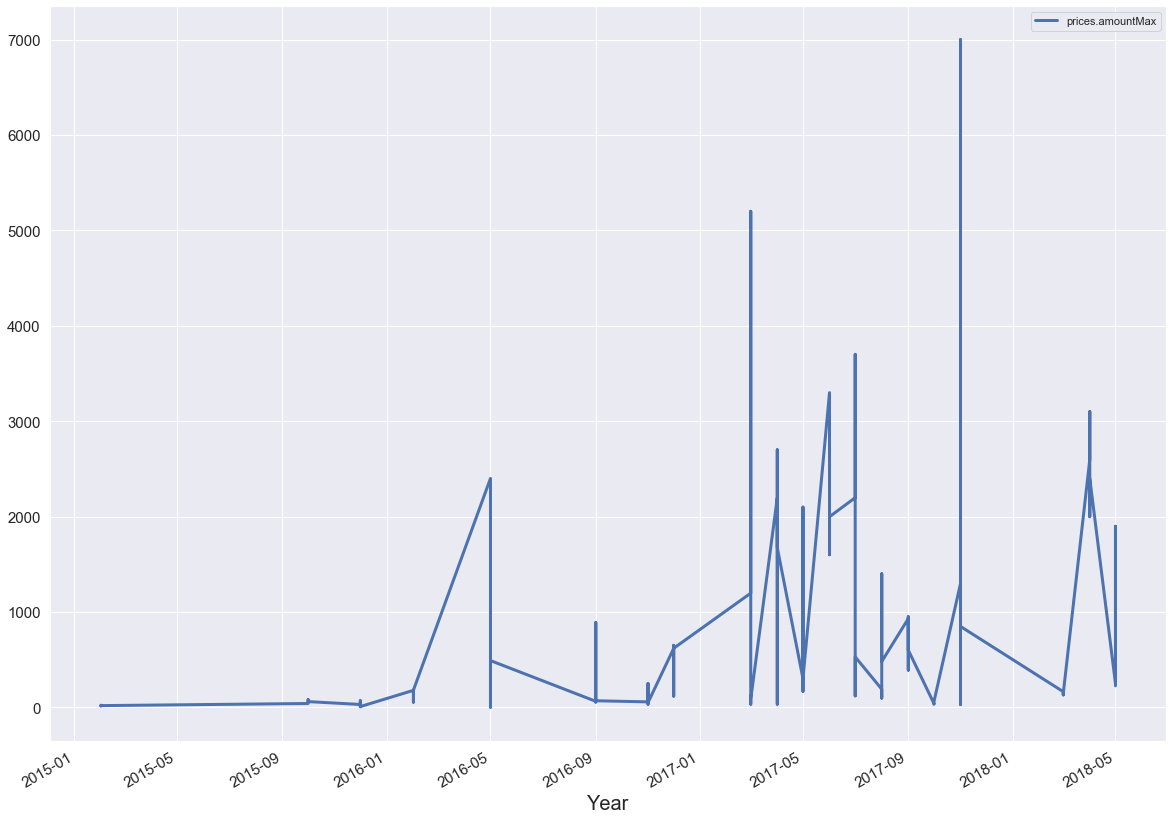

In [29]:
st.plot(figsize=(20,15), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20);

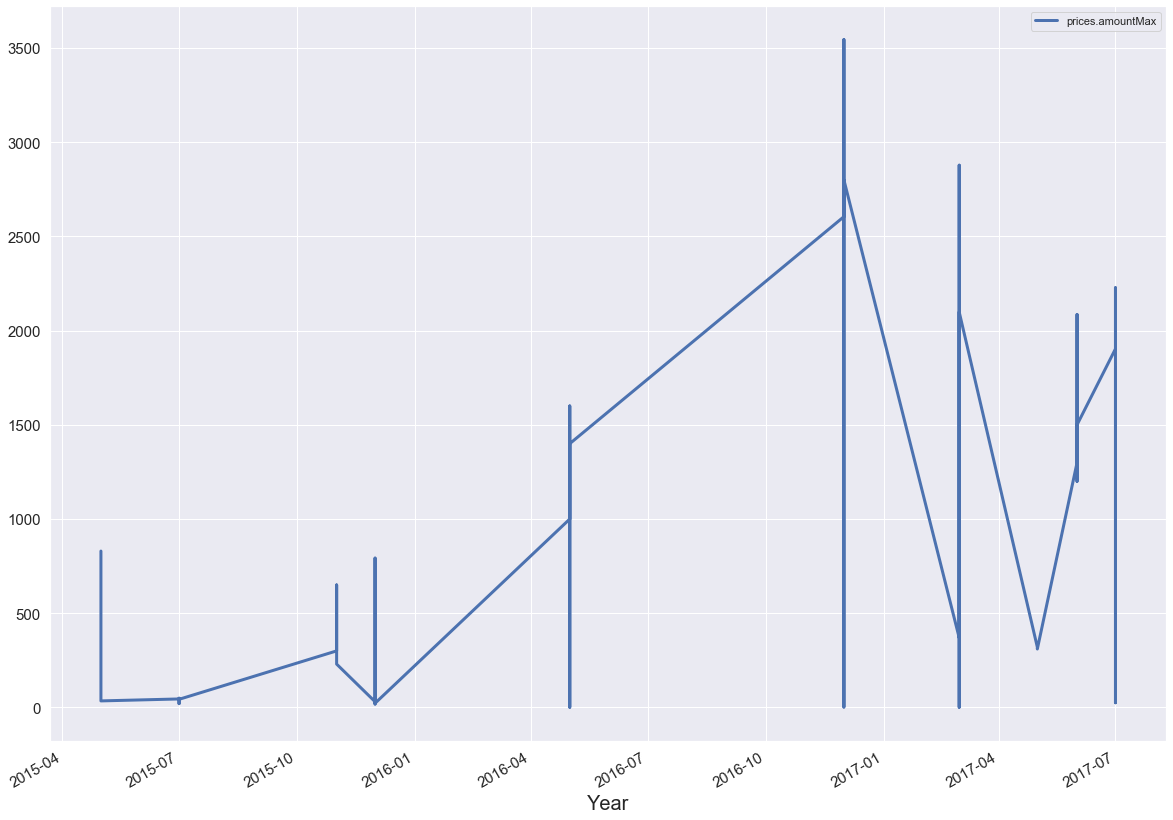

In [30]:
at.plot(figsize=(20,15), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20);

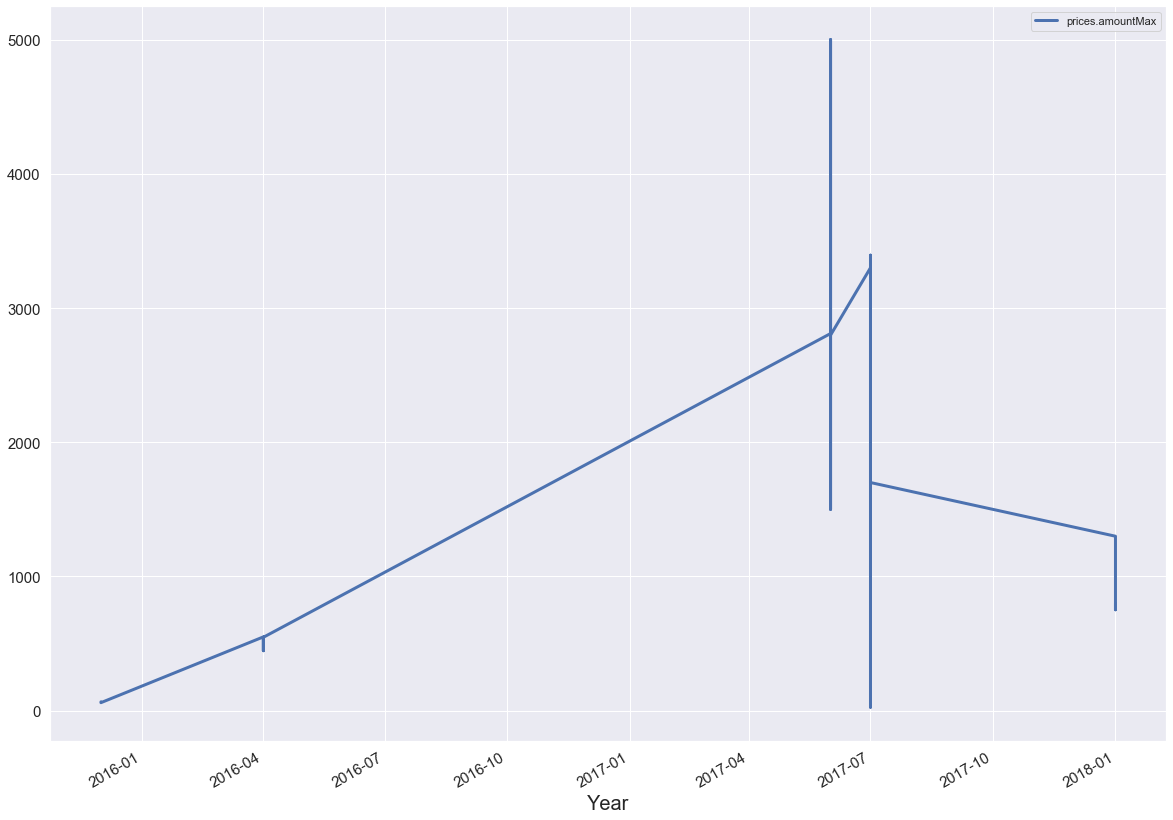

In [31]:
lgt.plot(figsize=(20,15), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20);

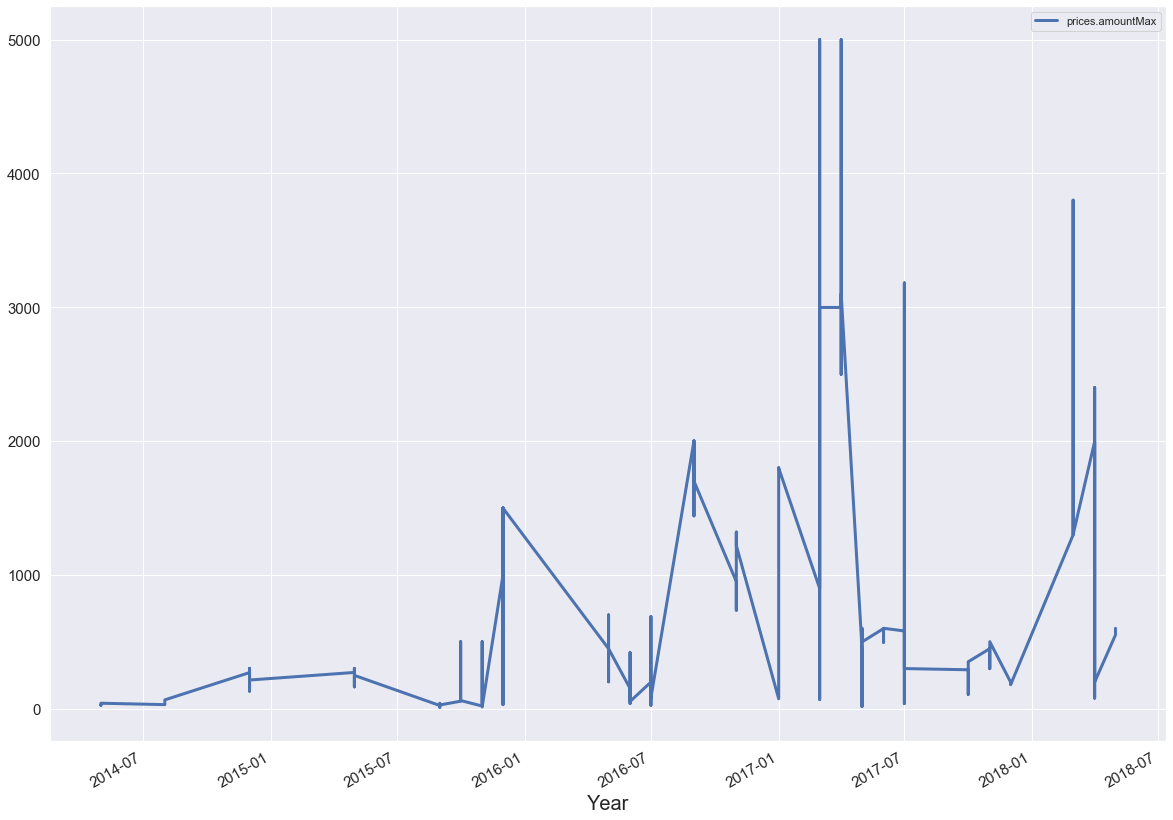

In [32]:
sot.plot(figsize=(20,15), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=20);

Text(0, 0.5, 'Price')

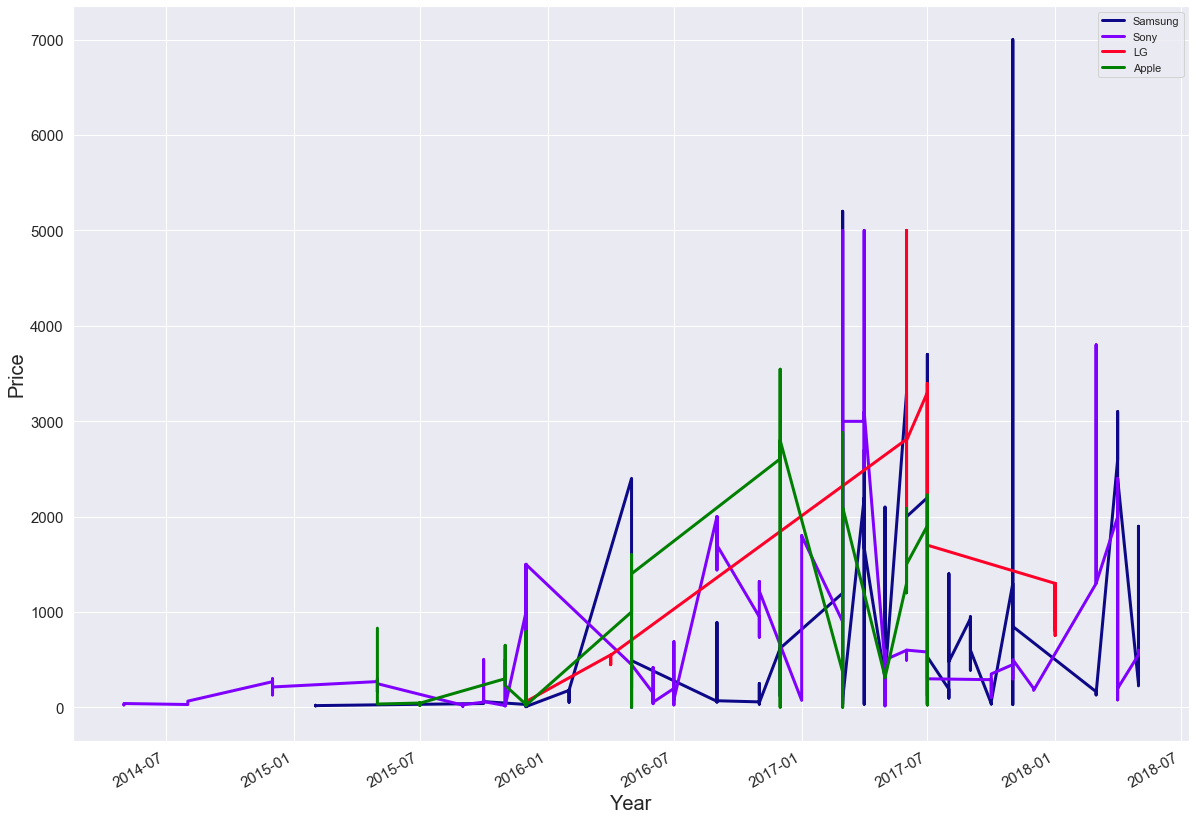

In [33]:
mylabels = ['Samsung','Sony','LG','Apple']

fig, ax = plt.subplots(figsize=(20,15))

st.plot(figsize=(20,15), linewidth=3, fontsize=15, ax=ax, colormap = 'plasma')
sot.plot(figsize=(20,15), linewidth=3, fontsize=15, ax=ax, colormap = 'rainbow')
lgt.plot(figsize=(20,15), linewidth=3, fontsize=15, ax=ax, colormap = 'gist_rainbow')
at.plot(figsize=(20,15), linewidth=3, fontsize=15, ax=ax, colormap = 'ocean')

ax.legend(labels=mylabels)

plt.xlabel('Year', fontsize=20);
plt.ylabel('Price', fontsize=20)

6. Does the features correlated to each others ?

In [34]:
#Select out the categorical_column
categorical_columns_mask = df.dtypes==object
categorical_columns = df.columns[categorical_columns_mask].tolist()

In [35]:
#Label Encoding for further classfication and correlation plot
dfle = df.copy()
le = LabelEncoder()
d = defaultdict(LabelEncoder)
dfle[categorical_columns] = dfle[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

In [36]:
#Data Transformation
#Used Min-Max Scaler for make it equal weights 
min_max_scaler = MinMaxScaler()
dfle[["prices.amountMax", "prices.amountMin"]] = min_max_scaler.fit_transform(dfle[["prices.amountMax", "prices.amountMin"]])

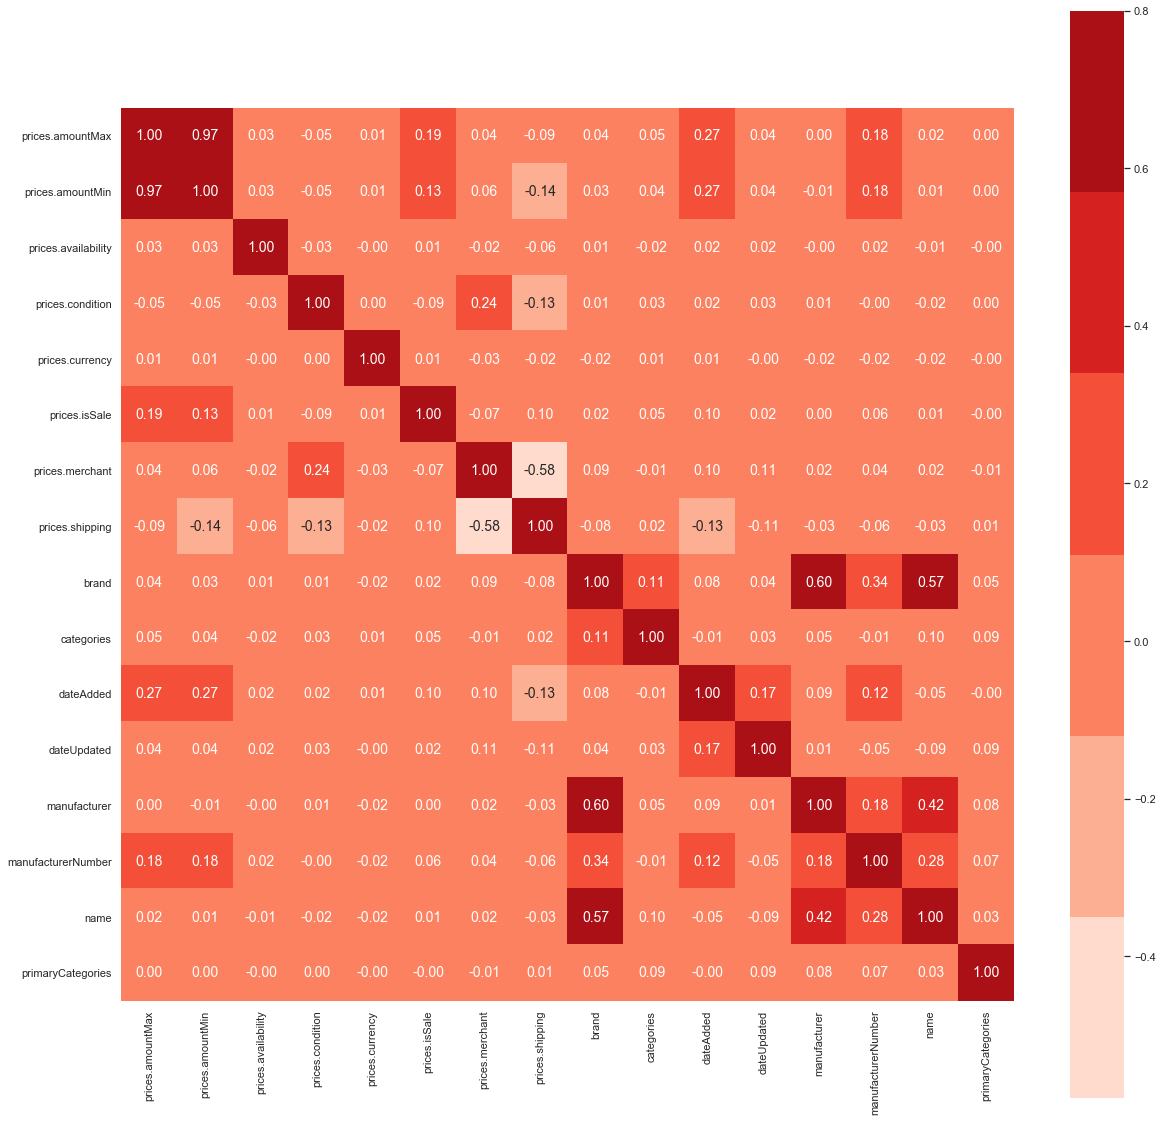

In [37]:
#Correlation plot
corr = dfle.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt= '.2f',
           annot_kws={'size': 14}, cmap=sns.color_palette("Reds"))

In [38]:
dfle.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248
prices.amountMax,0.014858,0.009716,0.009716,0.009857,0.009429,0.009287,0.010572,0.009286,0.009857,0.009716,...,0.011572,0.011280,0.010976,0.009500,0.009533,0.011286,0.009680,0.010000,0.010143,0.00954
prices.amountMin,0.017335,0.010667,0.011335,0.011500,0.011000,0.010835,0.012334,0.010833,0.011500,0.010502,...,0.013501,0.013161,0.012805,0.011084,0.011122,0.013167,0.011294,0.011667,0.011834,0.01113
prices.availability,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
prices.condition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
prices.currency,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
prices.isSale,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
prices.merchant,55.000000,268.000000,268.000000,55.000000,55.000000,268.000000,68.000000,55.000000,268.000000,268.000000,...,55.000000,334.000000,334.000000,334.000000,334.000000,55.000000,334.000000,55.000000,55.000000,268.00000
prices.shipping,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.00000
brand,182.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.00000
categories,47.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000


# Machine Learning Techniques 

7. What are the factors that can used to predict the product is in promotion ? 

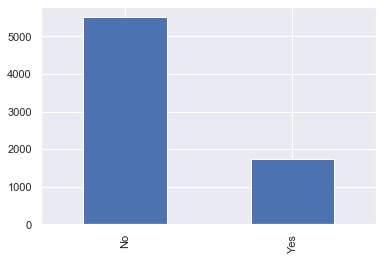

In [39]:
df["prices.isSale"].value_counts().plot(kind='bar')

1    4394
0    4394
Name: prices.isSale, dtype: int64


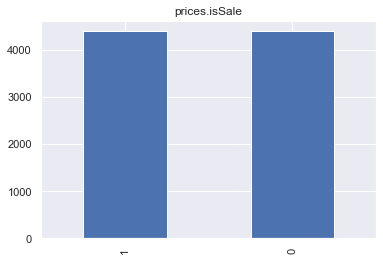

In [40]:
X = dfle.drop("prices.isSale", 1)
y = dfle["prices.isSale"]
features = X.columns
#us = RandomUnderSampler(sampling_strategy='majority', random_state=15)
os = SMOTE(sampling_strategy="not majority", k_neighbors=5,random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size = 0.2, random_state=10)
X,y = os.fit_resample(X_train,y_train)
X = pd.DataFrame(data=X,columns=features)
y = pd.DataFrame(data=y,columns=['prices.isSale'])
y["prices.isSale"].value_counts().plot(kind="bar")
plt.title("prices.isSale")
print(y["prices.isSale"].value_counts())
y = pd.Series(y['prices.isSale'].values)

# Feature Selection

In [41]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [42]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators=100, random_state = 6)
feat_selector.fit(X.values, y.values.ravel())
colnames = X.columns
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [43]:
print('---------Top 5----------')
display(boruta_score.head(5))
print('---------Bottom 5----------')
boruta_score.tail(5)

---------Top 5----------


,Features,Score
0,prices.amountMax,1.0
1,prices.amountMin,1.0
3,prices.condition,1.0
5,prices.merchant,1.0
6,prices.shipping,1.0


---------Bottom 5----------


,Features,Score
12,manufacturerNumber,1.00
13,name,1.00
2,prices.availability,0.67
14,primaryCategories,0.33
4,prices.currency,0.00


Text(0.5, 1, 'Boruta Top 18 Features')

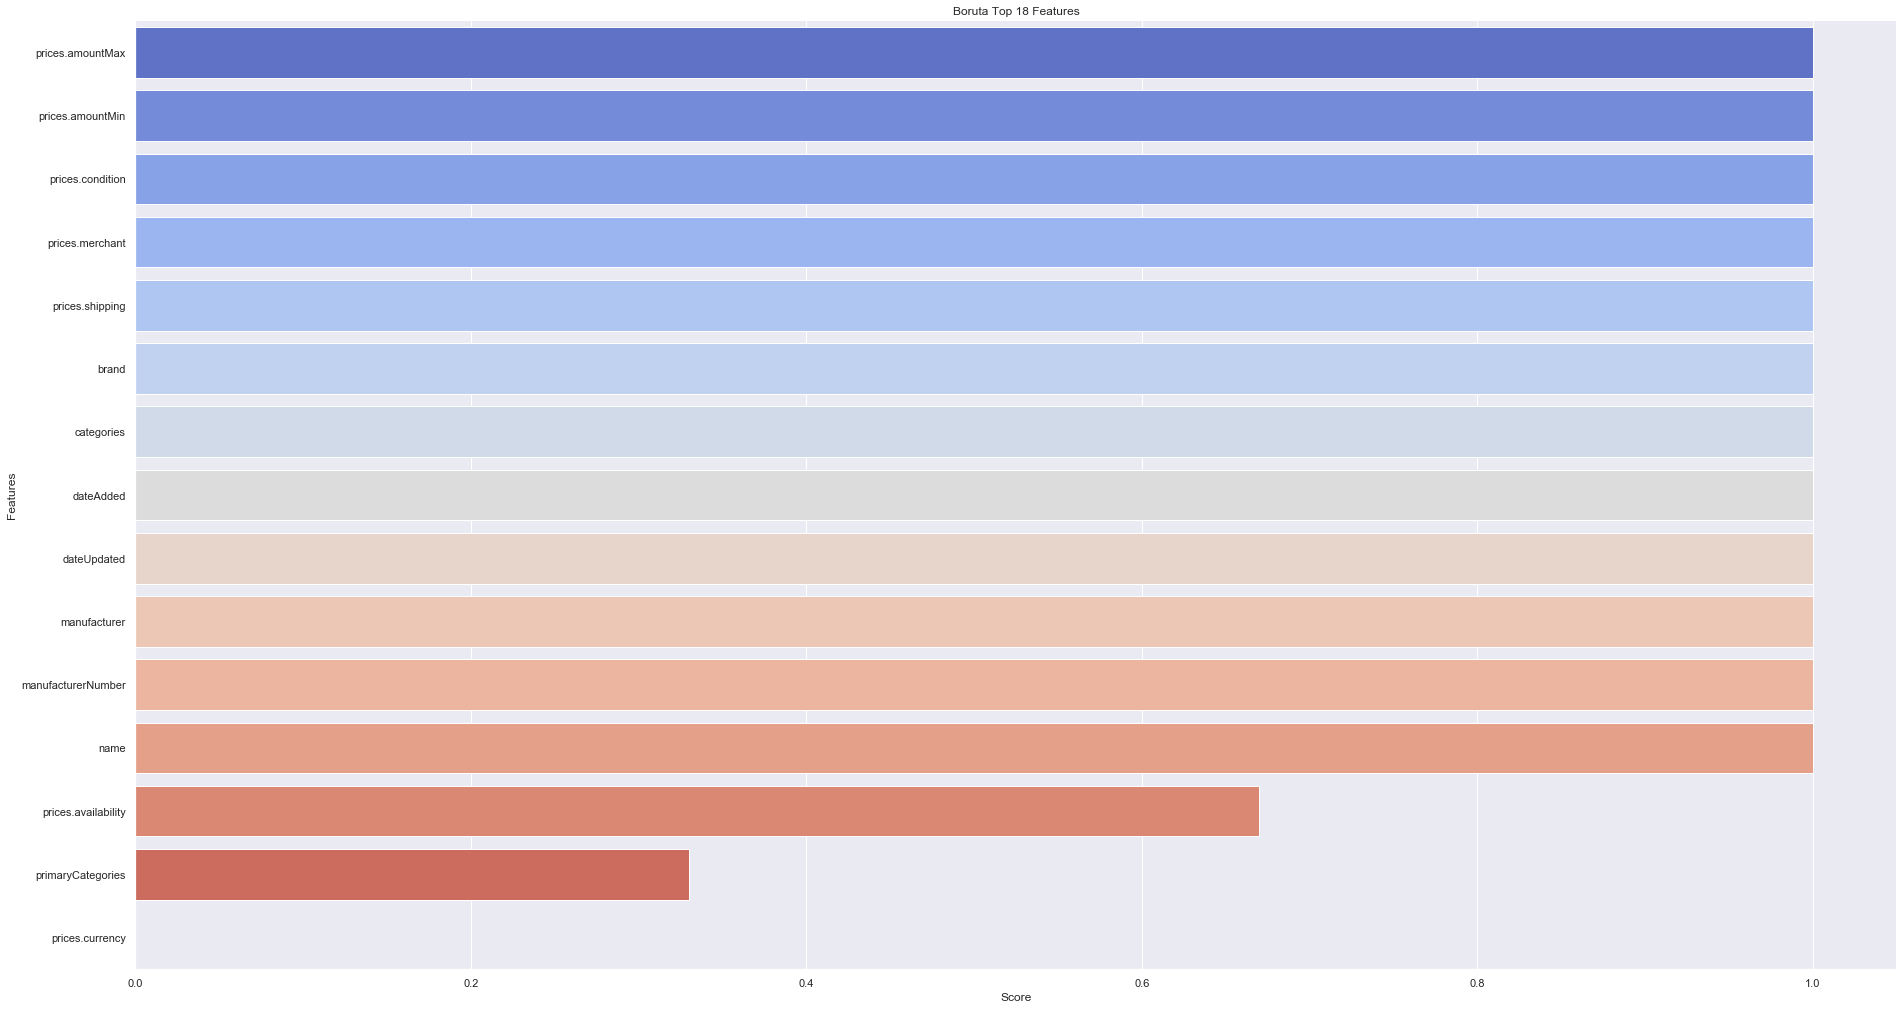

In [44]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:18], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 18 Features")

# Optimal Feature Set 

In [45]:
#Drop the feature in least important score 
X.drop(columns=['prices.currency'], inplace=True)
#X1.drop(columns=['prices.currency','primaryCategories','prices.availability'], inplace=True)

Predictive question for prices.isSale

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=7)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]
auc_RF = roc_auc_score(y_test, prob_RF)
print("Accuracy on training set : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf.score(X_test, y_test)))
print('AUC: %.2f' % auc_RF)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Mjority classifier Confusion Matrix\n', confusion_majority)
print('**********************')
print('Majority TN = ', confusion_majority[0][0])
print('Majority FP = ', confusion_majority[0][1])
print('Majority FN = ', confusion_majority[1][0])
print('Majority TP = ', confusion_majority[1][1])
print('**********************')
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

Accuracy on training set : 0.998
Accuracy on test set     : 0.852
AUC: 0.93
Mjority classifier Confusion Matrix
 [[1159  179]
 [ 210 1089]]
**********************
Majority TN =  1159
Majority FP =  179
Majority FN =  210
Majority TP =  1089
**********************
Precision= 0.86
Recall= 0.84
F1= 0.85
Accuracy= 0.85


In [48]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
prob_KNN = knn.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]
auc_RF = roc_auc_score(y_test, prob_KNN)
print("Accuracy on training set : {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(knn.score(X_test, y_test)))
print('AUC: %.2f' % auc_RF)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Mjority classifier Confusion Matrix\n', confusion_majority)
print('**********************')
print('Majority TN = ', confusion_majority[0][0])
print('Majority FP = ', confusion_majority[0][1])
print('Majority FN = ', confusion_majority[1][0])
print('Majority TP = ', confusion_majority[1][1])
print('**********************')
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

Accuracy on training set : 0.811
Accuracy on test set     : 0.742
AUC: 0.82
Mjority classifier Confusion Matrix
 [[ 917  421]
 [ 260 1039]]
**********************
Majority TN =  917
Majority FP =  421
Majority FN =  260
Majority TP =  1039
**********************
Precision= 0.71
Recall= 0.80
F1= 0.75
Accuracy= 0.74


In [55]:
a = float(input('prices.amountMax: '))
b = float(input('prices.amountMin: '))
c = input('prices.condition: ')
d = input('prices.isSale: ')
e = input('prices.merchant: ')
f = input('prices.shipping: ')
g = input('brand: ')
h = input('categories: ')
i = input('dateAdded: ')
j = input('dateUpdated: ')
k = input('manufacturer: ')
l = input('manufacturerNumber: ')
m = input('name: ')
n = input('primaryCategories: ')
test = [[a,b,c,d,e,f,g,h,i,j,k,l,m,n]]

prices.amountMax: 0.5
prices.amountMin: 0.3
prices.condition: 15
prices.isSale: 15
prices.merchant: 16
prices.shipping: 17
brand: 45
categories: 63
dateAdded: 12
dateUpdated: 113
manufacturer: 15
manufacturerNumber: 16
name: 23
primaryCategories: 10


In [56]:
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.5,0.3,15,15,16,17,45,63,12,113,15,16,23,10


In [63]:
prediction = rf.predict(test)
print('Result: ',prediction[0])

Result:  0


In [65]:
prediction = knn.predict(test)
print('Result: ',prediction[0])

Result:  0


# Model Evaluation

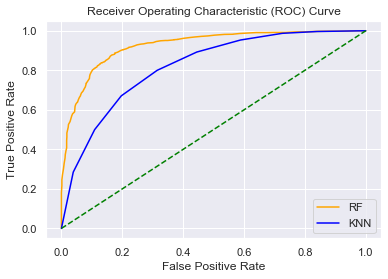

In [66]:
plt.plot(fpr_RF, tpr_RF, color='orange', label='RF') 
plt.plot(fpr_KNN, tpr_KNN, color='blue', label='KNN')  
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

8. Does the product's promotion affect product availability ?

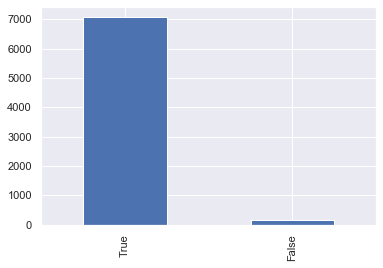

In [67]:
df2 = df.copy()
df2 = df2[~df2['prices.availability'].isin(['Not Specified'])]
df2['prices.availability'].value_counts().plot(kind = 'bar')

In [68]:
#df3 = df2[["prices.isSale","prices.availability"]]
#df3

In [69]:
categorical_columns_mask = df2.dtypes==object
categorical_columns = df2.columns[categorical_columns_mask].tolist()

In [70]:
#Test
#categorical_columns_mask = df3.dtypes==object
#categorical_columns = df3.columns[categorical_columns_mask].tolist()

In [71]:
dfle = df2.copy()
le = LabelEncoder()
d = defaultdict(LabelEncoder)
dfle[categorical_columns] = dfle[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

In [72]:
#Test
#dfle = df3.copy()
#le = LabelEncoder()
#d = defaultdict(LabelEncoder)
#dfle[categorical_columns] = dfle[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

In [73]:
min_max_scaler = MinMaxScaler()
dfle[["prices.amountMax", "prices.amountMin"]] = min_max_scaler.fit_transform(dfle[["prices.amountMax", "prices.amountMin"]])

1    5659
0    5659
Name: prices.availability, dtype: int64


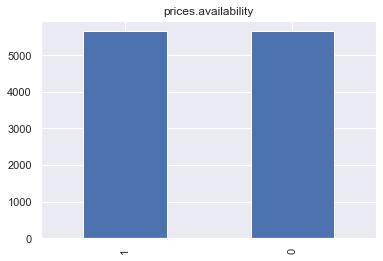

In [74]:
X = dfle.drop("prices.availability", 1)
y = dfle["prices.availability"]
features = X.columns
#us = RandomUnderSampler(sampling_strategy='majority', random_state=15)
os = SMOTE(sampling_strategy="not majority", k_neighbors=5,random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size = 0.2, random_state=10)
X,y = os.fit_resample(X_train,y_train)
X = pd.DataFrame(data=X,columns=features)
y = pd.DataFrame(data=y,columns=['prices.availability'])
y["prices.availability"].value_counts().plot(kind="bar")
plt.title("prices.availability")
print(y["prices.availability"].value_counts())
y = pd.Series(y['prices.availability'].values)

In [75]:
dfle

,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.isSale,prices.merchant,prices.shipping,brand,categories,dateAdded,dateUpdated,manufacturer,manufacturerNumber,name,primaryCategories
0,0.014858,0.017335,1,0,1,0,55,2,181,46,26,36,115,745,623,3
1,0.009716,0.010667,1,0,1,1,268,2,29,702,31,50,30,157,124,3
2,0.009716,0.011335,1,0,1,0,268,2,29,702,31,50,30,157,124,3
3,0.009857,0.011500,1,0,1,0,55,2,29,702,31,50,30,157,124,3
4,0.009429,0.011000,1,0,1,0,55,2,29,702,31,50,30,157,124,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,0.011286,0.013167,1,0,1,0,55,2,114,87,122,50,96,385,393,3
7245,0.009680,0.011294,1,0,1,0,334,1,114,87,122,50,96,385,393,3
7246,0.010000,0.011667,1,0,1,0,55,2,114,87,122,50,96,385,393,3
7247,0.010143,0.011834,1,0,1,0,55,2,114,87,122,50,96,385,393,3


# Feature Selection

In [76]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [77]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators=100, random_state = 6)
feat_selector.fit(X.values, y.values.ravel())
colnames = X.columns
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [78]:
print('---------Top 5----------')
display(boruta_score.head(5))
print('---------Bottom 5----------')
boruta_score.tail(5)

---------Top 5----------


,Features,Score
0,prices.amountMax,1.0
1,prices.amountMin,1.0
2,prices.condition,1.0
4,prices.isSale,1.0
5,prices.merchant,1.0


---------Bottom 5----------


,Features,Score
11,manufacturer,1.0
12,manufacturerNumber,1.0
13,name,1.0
14,primaryCategories,1.0
3,prices.currency,0.0


Text(0.5, 1, 'Boruta Top 18 Features')

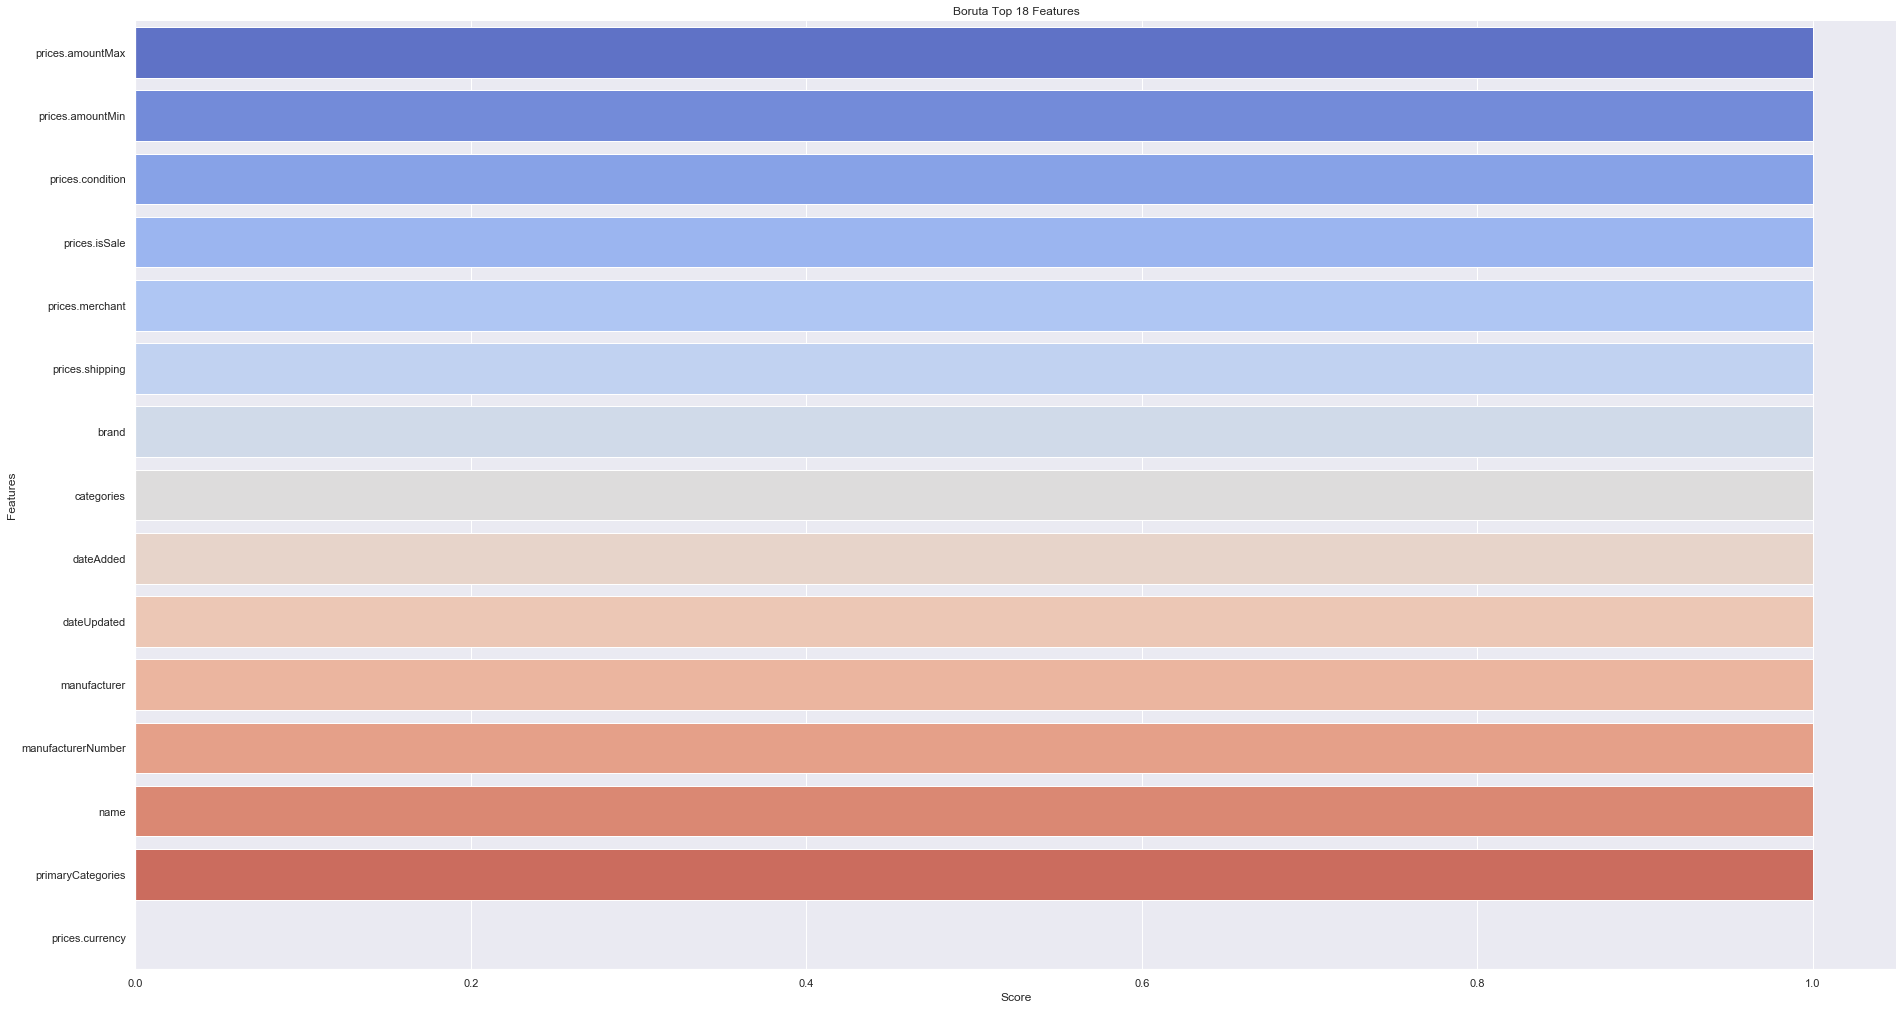

In [79]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:18], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 18 Features")

# Optimal Feature Set 

In [80]:
X.drop(columns=['prices.currency'], inplace=True)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]
auc_RF = roc_auc_score(y_test, prob_RF)
print("Accuracy on training set : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf.score(X_test, y_test)))
print('AUC: %.2f' % auc_RF)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Mjority classifier Confusion Matrix\n', confusion_majority)
print('**********************')
print('Majority TN = ', confusion_majority[0][0])
print('Majority FP = ', confusion_majority[0][1])
print('Majority FN = ', confusion_majority[1][0])
print('Majority TP = ', confusion_majority[1][1])
print('**********************')
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

Accuracy on training set : 1.000
Accuracy on test set     : 0.984
AUC: 1.00
Mjority classifier Confusion Matrix
 [[1644   20]
 [  36 1696]]
**********************
Majority TN =  1644
Majority FP =  20
Majority FN =  36
Majority TP =  1696
**********************
Precision= 0.99
Recall= 0.98
F1= 0.98
Accuracy= 0.98


In [83]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
prob_KNN = knn.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]
auc_RF = roc_auc_score(y_test, prob_KNN)
print("Accuracy on training set : {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(knn.score(X_test, y_test)))
print('AUC: %.2f' % auc_RF)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Mjority classifier Confusion Matrix\n', confusion_majority)
print('**********************')
print('Majority TN = ', confusion_majority[0][0])
print('Majority FP = ', confusion_majority[0][1])
print('Majority FN = ', confusion_majority[1][0])
print('Majority TP = ', confusion_majority[1][1])
print('**********************')
print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

Accuracy on training set : 0.926
Accuracy on test set     : 0.901
AUC: 0.98
Mjority classifier Confusion Matrix
 [[1645   19]
 [ 316 1416]]
**********************
Majority TN =  1645
Majority FP =  19
Majority FN =  316
Majority TP =  1416
**********************
Precision= 0.99
Recall= 0.82
F1= 0.89
Accuracy= 0.90


# Model Evaluation

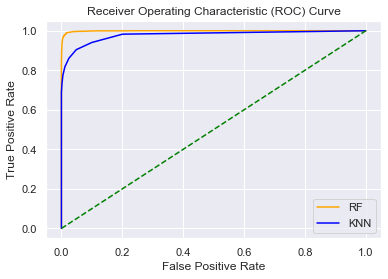

In [84]:
plt.plot(fpr_RF, tpr_RF, color='orange', label='RF') 
plt.plot(fpr_KNN, tpr_KNN, color='blue', label='KNN')  
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [87]:
a = float(input('prices.amountMax: '))
b = float(input('prices.amountMin: '))
c = input('prices.condition: ')
d = input('prices.isSale: ')
e = input('prices.merchant: ')
f = input('prices.shipping: ')
g = input('brand: ')
h = input('categories: ')
i = input('dateAdded: ')
j = input('dateUpdated: ')
k = input('manufacturer: ')
l = input('manufacturerNumber: ')
m = input('name: ')
n = input('primaryCategories: ')
test = [[a,b,c,d,e,f,g,h,i,j,k,l,m,n]]

prices.amountMax: 0.9
prices.amountMin: 0.8
prices.condition: 43
prices.isSale: 56
prices.merchant: 73
prices.shipping: 53
brand: 23
categories: 73
dateAdded: 23
dateUpdated: 62
manufacturer: 12
manufacturerNumber: 67
name: 80
primaryCategories: 12


In [88]:
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.9,0.8,43,56,73,53,23,73,23,62,12,67,80,12


In [91]:
prediction = rf.predict(test)
print('Result: ',prediction[0])


Result:  1


In [92]:
prediction = knn.predict(test)
print('Result: ',prediction[0])

Result:  1
